# Pre-procesado de un dataset real con la librería de Pandas
------------------------------------------------------

### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------


En este notebook se revisarán los pasos para cargar y pre-procesar un dataset a través de un ejemplo. Para ello, se usará **[Python Data Analysis Library](https://pandas.pydata.org/)** (a.k.a. pandas).

Los pasos que se aplican son los siguientes:


*   Eliminar variables que no sean de utilidad
*   Tratar los datos perdidos
*   Crear una etiqueta para la clase binaria
*   Crear los conjuntos de entrenamiento y de test
*   Normalizar las variables de entrada




In [1]:
import pandas as pd # pd es un simple alias
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # Figuras de alta calidad



El [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) contiene 10 características relacionadas con tumores de pecho que han sido diagnosticados como benignos o malignos. Tienes una descripción de las 10 características en el link de arriba. Ahí puedes descargar el dataset como un archivo csv. 

Nosotros lo importaremos directamente utilizando la siguiente clase.

In [3]:
def load_spam():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)
    data.columns=['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
    return data
    # en la tabla original no hay cabecera de columna por eso lo añado

Los datos se almacenan en un dataframe, un tipo de datos específico de Pandas.

In [4]:
data = load_spam()

Visualizemos las primeras 10 entradas de los datos con el método `.head()` 

In [10]:
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


Con el método `.shape()` podemos comprobar cuántos datapoints tenemos

In [11]:
print('Hay %d observaciones, cada una de dimension %d' %(data.shape[0], data.shape[1]))

Hay 699 observaciones, cada una de dimension 10


Haremos los siguientes pasos de preprocesado. Todos implementados en Pandas (es aconsejable para datasets grandes):

- Eliminamos la columna 'ID'. No la usaremos más.

- Analizamos los datos perdidos (Codificados en este dataset como '?' por el modo de la columna). 

- La clase es igual a 2 para tumores benignos y 4 para los malignos. Reemplazaremos esto por 0 y 1 respectivamente.

- Creamos conjuntos de entrenamiento y test.

- Normalizaremos todas las variables de entrada para que tengan media cero y varianza unidad.

### Eliminar la columna ID


Podemos usar el método `.drop()`. Usamos la entrada `inplace=True` para sobreescribir el dataframe existente.

In [ ]:
data.drop('ID', axis=1, inplace=True) #axis=0 borra filas axis=1 borra columnas, inplace=True lo guarda en la misma columna, si no lo pongo no lo guarda en ningún lado.
#data_sinID = data.drop('ID', axis=1) así creo una data nueva, es una manera de no perder la columna axis.

Veamos el resultado

In [8]:
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


### Sobre datos perdidos

Pandas considera valores como `NaN` y `None` para representar datos perdidos. La función `pandas.isnull` se puede usar para decir si un valor está perdido o no. 

Usemos `apply()` a lo largo de la columnas en nuestro DataFrame para averiguar qué valores están perdidos. Pero primero cambiemos la codificación que indica dato perdido, `?`, por `NaN`.

In [13]:
data.replace('?', np.nan, inplace=True) # en librería numpy; también podríamos reemplazar por None, son iguales en panda.

In [14]:
data.isnull()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False


La celda anterior crea un nuevo dataframe con un flag de True o False sobre si el dato está perdido o no y se aplica a toda nuestra matriz del dataframe.

In [15]:
data.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Observa que sólo una de la columnas tiene 16 datos perdidos. Por simplicidad, eliminemos dicha columna. Se consciente que en general imputaremos los valores perdidos con algún valor representativo.

In [16]:
data.drop('Bare Nuclei', axis=1, inplace=True) # dos opciones eliminar 16 filas o solo una columna, aquí se ha decidido eliminar la columna

In [17]:
#empty = data.apply(lambda col: pd.isnull(col))
#empty.sum()
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Crear una etiqueta de clase binaria

Para ello, crearemos una simple función para convertir la etiqueta y almacenar el resultado en una nueva columna del dataframe.

In [21]:
def convertirABinario(l):
    return (l-2.0)/2

'''otra forma de hacerlo sería:
    if l==4:
      l=1
    elif==2
      l=0 '''

'otra forma de hacerlo sería:\n    if l==4:\n      l=1\n    elif==2\n      l=0 '

In [ ]:
data['Binary Class'] = data[['Class']].apply(lambda l: convertirABinario(l)) # la función que le aplico le doy nombre nuevo a cada elemento leo la columna a la que le quiero aplicar .apply ponemos lambda y pongo como voy a llamar a cada elemento en este caso l: nombre función y la misma (l) , a cada elemento le aplico la función y lo sustituye.

data.drop('Class', axis=1, inplace=True)



Miremos el histograma de la etiqueta de la clase binaria

<AxesSubplot:>

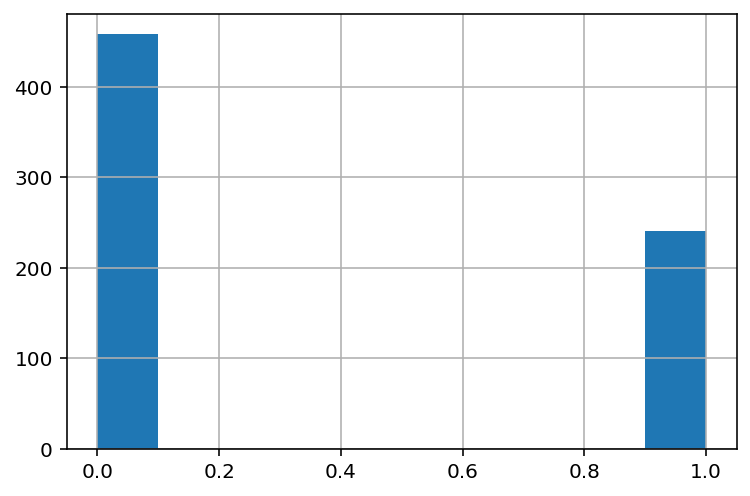

In [23]:
data['Binary Class'].hist()

### Crear conjuntos de datos de entrenamiento y de test

Simplemente dividiremos el dataset aleatoriamente. El 80% de los datos irá para entrenamiento, y el resto para test. Usaremos [la función de permutación aleatoria de Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) y el método `.iloc()` . 

In [24]:
frac_train = 0.8

N_data_train = int(data.shape[0]*frac_train) # Número de datos de entrenamiento

np.random.seed(seed=10) # Para fijar una semilla de aleatoriedad. Todos en todas las ejecuciones haremos la misma partición

mask = np.random.permutation(data.shape[0]) # Ordenación aleatoria de los índices de los datos

train_data = data.iloc[list(mask[:N_data_train])].copy()

test_data = data.iloc[list(mask[N_data_train:])].copy()


In [26]:
print(train_data.shape) # 9 son las columnas y los otros datos son las filas, tenemos el 80% para train y el 20% para test
print(test_data.shape)

(559, 9)
(140, 9)


Date cuenta de que almacenados los datos de entrenamiento y de test en diferentes Dataframes, así podemos normalizarlos sin modificar los datos originales (Podríamos añadir más columnas al Dataframe original, pero esto luego sería molesto para indexar).



También la partición de entrenamiento y de test se puede hacer facilmente con numpy y la [librería sklearn](https://scikit-learn.org/stable/). Lo verás en el siguiente notebook!

### Normalizar las variables de entrada

En general, no es recomendable que las variables de entrada (o características) se definan en diferentes rangos. I.e., $x_1$ toma valores en el rango $[-1,1]$ y $x_2$ entre $[-10^6,10^6]$. 

Para mejorar tanto la robustez de nuestros estimadores como **mejorar la interpretabilidad**, aplicaremos un paso de preprocesado de normalización lineal para usar las características con media (muestral) 0 y varianza (muestral) igual a 1. 

Dada la matrix de características sin normalizar, $\mathbf{X}_{N\times D}$, calculamos la media muestral por cada columna de las características, $\mu_j$, así como la varianza muestral, $\sigma^2_j$ para $j=1,\ldots,D$. Luego, cada fila de la matriz de características normalizadas $\overline{\mathbf{X}}_{N\times D}$ se obtiene de la siguiente manera:

$$\overline{\mathbf{x}}^{(i)}= \left[\frac{x_1^{(i)}-\mu_1}{\sqrt{\sigma^2_1}}, ~~ \frac{x_2^{(i)}-\mu_2}{\sqrt{\sigma^2_2}}, \ldots, \frac{x_D^{(i)}-\mu_D}{\sqrt{\sigma^2_D}}\right]$$

**Ten en cuenta que esto no afecta a la solución del modelo que luego vayamos a aplicar**, simplemente estamos reescalando el vector de los parámetros $\boldsymbol{w}$ del modelo. Usando esta escala, ahora podemos comparar el efecto de cada variable en la solución del modelo de una manera efectiva: **cuanto más grande sea $|w_j|$, más afectará la característica $j$-th en la estimación de la clase**.

Un aspecto importante es que el conjunto de test se normaliza **usando las estadísticas del conjunto de entrenamiento (media y varianza)**

utilizo los datos de entrenamiento y todo lo que le haga a entrenamiento se lo hago después a test. nomralizamos con datos de entrenamiento y todo eso lo repetiremos en test.

In [27]:
medias = train_data.mean()
desviaciones = train_data.std()

In [28]:
for indice, nombre_columna in enumerate(train_data.columns[:-1]): # no se normaliza la columna de salida, la última que hemos creado, cambia la escala 
    print(nombre_columna)
    train_data[nombre_columna] = (train_data[nombre_columna]-medias[indice])/(desviaciones[indice])
    test_data[nombre_columna] = (test_data[nombre_columna]-medias[indice])/(desviaciones[indice])

Clump Thickness
Uniformity of Cell Size
Uniformity of Cell Shape
Marginal Adhesion
Single Epithelial Cell Size
Bland Chromatin
Normal Nucleoli
Mitoses


Vamos a mirar el dataframe resultado


In [29]:
train_data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Binary Class
285,1.300525,2.285664,2.276496,2.455409,2.286331,2.658239,1.330666,0.867001,1.0
607,-1.212539,-0.700359,-0.747811,-0.642951,-0.552749,-1.010787,-0.608106,-0.338605,0.0
587,0.223498,-0.700359,-0.747811,-0.642951,-0.552749,-0.603117,-0.284977,-0.338605,0.0
458,0.223498,-0.700359,-0.411777,-0.642951,-0.552749,-1.010787,-0.608106,-0.338605,0.0
431,0.223498,-0.700359,-0.747811,0.045573,0.393611,-0.195448,-0.284977,-0.338605,0.0
52,2.018543,-0.036799,0.932359,-0.298689,-0.079569,0.212222,2.300052,0.264198,1.0
560,0.223498,-0.700359,-0.747811,-0.642951,-0.552749,-0.195448,-0.608106,-0.338605,0.0
445,-0.853530,-0.700359,-0.747811,-0.642951,-0.552749,-1.010787,-0.608106,-0.338605,0.0
292,1.300525,1.622103,1.604428,-0.642951,-0.552749,1.027561,2.300052,-0.338605,1.0
579,-1.212539,-0.700359,-0.747811,-0.642951,-0.552749,-0.195448,-0.608106,-0.338605,0.0


Con este dataframe, el dataset estaría listo para entrenar algún modelo de clasificación como una regresión logística.

¿Qué es una regresión logística?
La regresión logística es una técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro.

En el siguiente notebook también explorarás la manera de hacer esta normalización con la librería de Scikit-Learn.